In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt 

In [2]:
distances = [
            [0,61,49,30], # 0-1,0-2,0-3
            [0,0,48,16],    # 1-2,1-3
            [0,0,0,54]        # 2-3
            ]

In [3]:
def init_pheromones(x):
    return [[x for _ in range(4)] for _ in range(3)]

def all_probs(distances, pheromones, current_city, available_cities, alpha, beta):
    logits = []
    for destination_city in available_cities:
        cities = [current_city, destination_city]
        cities.sort()
        logit = (pheromones[cities[0]][cities[1]]**alpha) * ((1/distances[cities[0]][cities[1]])**beta)
        logits.append(logit)
    probs = np.array(logits)/sum(logits)
    return probs

def choose_destination(distances, pheromones, current_city, available_cities, alpha, beta):
    probs = all_probs(distances, pheromones, current_city, available_cities, alpha, beta)
    [destination_city] = np.random.choice(available_cities, p=probs, size=1)
    return destination_city

def compute_length(distances, path):
    length = 0
    for i in range(len(path)-1):
        cities = [path[i], path[i+1]]
        cities.sort()
        length += distances[cities[0]][cities[1]]
    cities = [path[-1], path[0]]
    cities.sort()
    length += distances[cities[0]][cities[1]]
    return length        

def apply_pheromones_decay(pheromones, decay_rate):
    for i in pheromones:
        for j in range(len(i)):
            i[j] = (1-decay_rate)*i[j]
    return pheromones
        
def apply_pheromones_deposit(pheromones, path_sequences, lengths, q):
    for path, length in zip(path_sequences,lengths):
        for i in range(len(path)-1):
            cities = [path[i], path[i+1]]
            cities.sort()
            pheromones[cities[0]][cities[1]] += q/length
        cities = [path[-1], path[0]]
        cities.sort()
        pheromones[cities[0]][cities[1]] += q/length
    return pheromones

In [10]:
iterations = 100
n_ant = 1
pheromones = init_pheromones(0.1)
n_city = 4
alpha = 1
beta = 1
decay_rate = 0.2
q = 1

absolute_shortest_path = None
absolute_shortest_length = math.inf
shortest_length_each_iter = []
average_length_each_iter = []

for iteration in range(iterations):
    path_sequences = []
    # tour construction
    for _ in range(n_ant):
        path_sequence = []
        unvisited_cities = list(range(n_city))
        # random starting city
        current_city = random.randrange(0, n_city)
        unvisited_cities.remove(current_city)
        path_sequence.append(current_city)
        # traveling until done
        while unvisited_cities:
            destination_city = choose_destination(distances, pheromones, current_city, unvisited_cities, alpha, beta)
            current_city = destination_city
            path_sequence.append(destination_city)
            unvisited_cities.remove(destination_city)
        path_sequences.append(path_sequence[:])
    
    # save stats
    lengths = []
    for path in path_sequences:
        length = compute_length(distances, path)
        lengths.append(length)
    shortest_length = min(lengths)
    shortest_length_each_iter.append(shortest_length)
    average_length_each_iter.append(sum(lengths) / len(lengths))
    if shortest_length < absolute_shortest_length:
        absolute_shortest_length = shortest_length
        absolute_shortest_path = path_sequences[lengths.index(shortest_length)][:]
    
    # update pheromones
    for path in path_sequences:
        pheromones = apply_pheromones_decay(pheromones, decay_rate)
        pheromones = apply_pheromones_deposit(pheromones, path_sequences, lengths, q)

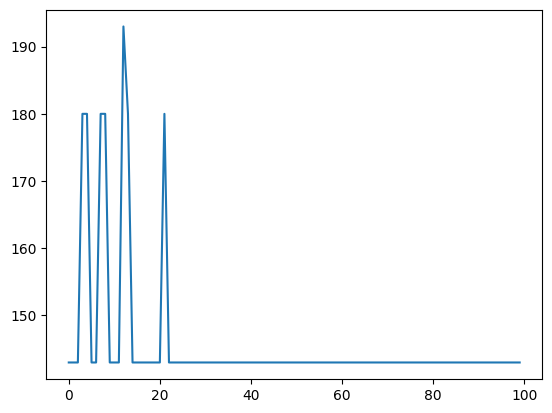

In [11]:
plt.plot(shortest_length_each_iter)

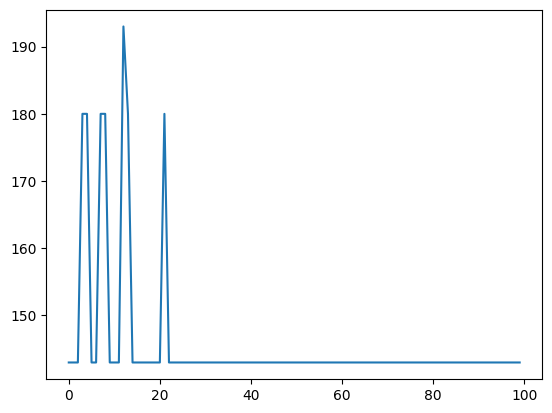

In [12]:
plt.plot(average_length_each_iter)

In [13]:
shortest_length_each_iter

[143,
 143,
 143,
 180,
 180,
 143,
 143,
 180,
 180,
 143,
 143,
 143,
 193,
 180,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 180,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143]

In [14]:
absolute_shortest_path

[2, 1, 3, 0]